In [20]:
import osmnx as ox
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from shapely import wkt
import networkx as nx

In [15]:
poi_df = pd.read_csv("../data/poi_filtrados.csv")
poi_df["geometry"] = poi_df["geometry"].apply(wkt.loads)
poi = gpd.GeoDataFrame(poi_df, geometry="geometry", crs="EPSG:3857")

comunas_poi = sorted(poi.Comuna.unique().tolist())
comunas = [f"{comuna}, Chile" for comuna in comunas_poi]

In [5]:
G = ox.graph_from_place(comunas, network_type="drive")
nodes, edges = ox.graph_to_gdfs(G)

print(edges.columns)
print(edges.head())

Index(['osmid', 'highway', 'lanes', 'maxspeed', 'name', 'oneway', 'reversed',
       'length', 'geometry', 'bridge', 'access', 'width', 'ref', 'junction',
       'tunnel'],
      dtype='object')
                           osmid       highway lanes maxspeed  \
u      v         key                                            
386138 14805063  0     121815664     secondary     3       50   
       500862146 0     121815695       primary     4       50   
386139 386138    0     926197834       primary     4       50   
       252524614 0    1247003604     secondary     2       50   
386140 500862085 0     407593364  unclassified     2       50   

                                                       name  oneway reversed  \
u      v         key                                                           
386138 14805063  0                         Enrique Mac Iver    True    False   
       500862146 0    Avenida Libertador Bernardo O'Higgins    True    False   
386139 386138    0    Avenida

In [23]:
G_export = G.copy()
ALLOWED = (str, int, float, bool)

# Limpiar atributos de nodos
for _, data in G_export.nodes(data=True):
    for k, v in list(data.items()):
        if isinstance(v, list):
            data[k] = ",".join(map(str, v))
        elif not isinstance(v, ALLOWED) and v is not None:
            data[k] = str(v)

# Limpiar atributos de aristas
for u, v, key, data in G_export.edges(keys=True, data=True):
    data.pop("geometry", None)

    for k, v_attr in list(data.items()):
        if isinstance(v_attr, list):
            data[k] = ",".join(map(str, v_attr))
        elif not isinstance(v_attr, ALLOWED) and v_attr is not None:
            data[k] = str(v_attr)

nx.write_gexf(G_export, "../data/calles_santiago.gexf")
print("GEXF guardado sin geometrías y sin atributos problemáticos.")


GEXF guardado sin geometrías y sin atributos problemáticos.


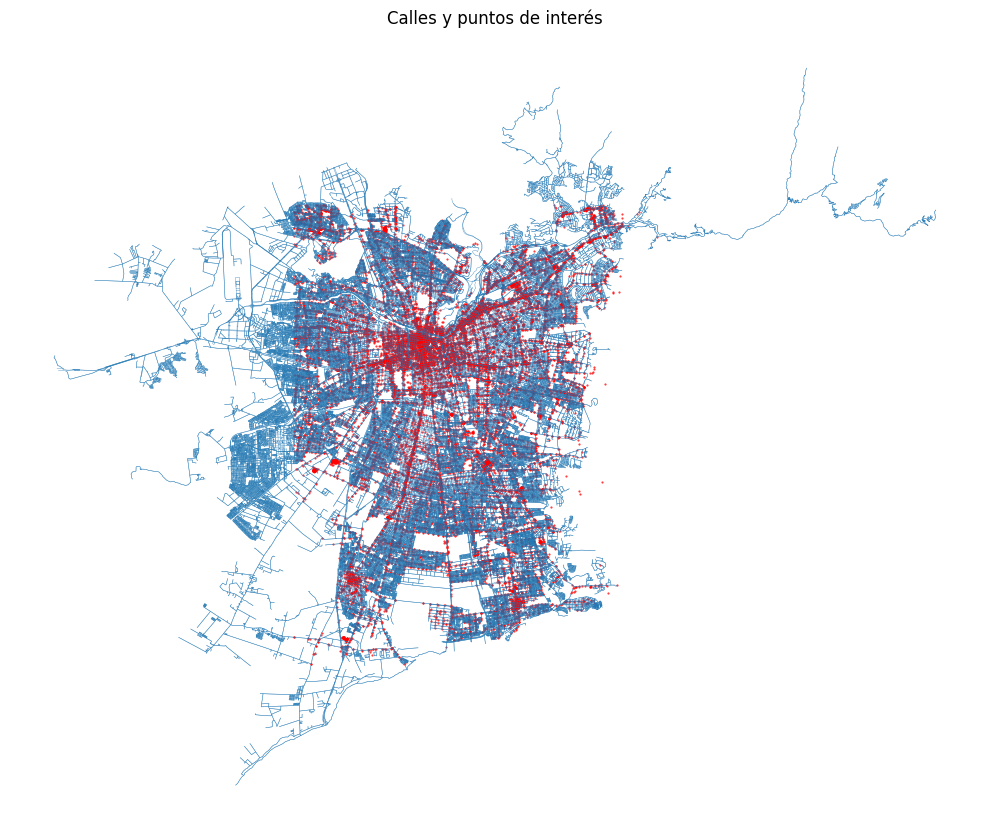

In [19]:
poi = poi.to_crs(edges.crs)

fig, ax = plt.subplots(figsize=(10, 10))

edges.plot(ax=ax, linewidth=0.35, alpha=0.7) # calles
poi.plot(ax=ax, markersize=0.3, alpha=0.8, color="red") # POI

ax.set_title("Calles y puntos de interés")
ax.set_axis_off()
plt.tight_layout()
plt.show()